## Sales Project using LinearRegression

#### Columns in the Dataset

ORDERNUMBER           
QUANTITYORDERED       
PRICEEACH           
ORDERLINENUMBER       
SALES               
ORDERDATE            
STATUS               
QTR_ID                
MONTH_ID             
YEAR_ID               
PRODUCTLINE         
MSRP                 
PRODUCTCODE         
CUSTOMERNAME         
PHONE                
ADDRESSLINE1        
ADDRESSLINE2         
CITY                 
STATE                
POSTALCODE           
COUNTRY              
TERRITORY            
CONTACTLASTNAME      
CONTACTFIRSTNAME     
DEALSIZE             

**This is a sales record of an International company dealing in production, sales, and shipping of different transportation merchandise. The record is a three years record from 2003-2005.The record is to be analysed to generate possible insights and apply linearRegression model for machine learning.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import codecs


In [2]:
#loading the data
sales = pd.read_csv("sales_sample.csv", sep = ',', engine  = 'python', encoding = 'latin1', thousands = ',')
sales.head()

#with codecs.open("sales_sample.csv", "r", encoding = 'utf-8', errors = 'ignore') as sales:

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
sales['YEAR_ID'].value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

### Company wih the highest number of patronization

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

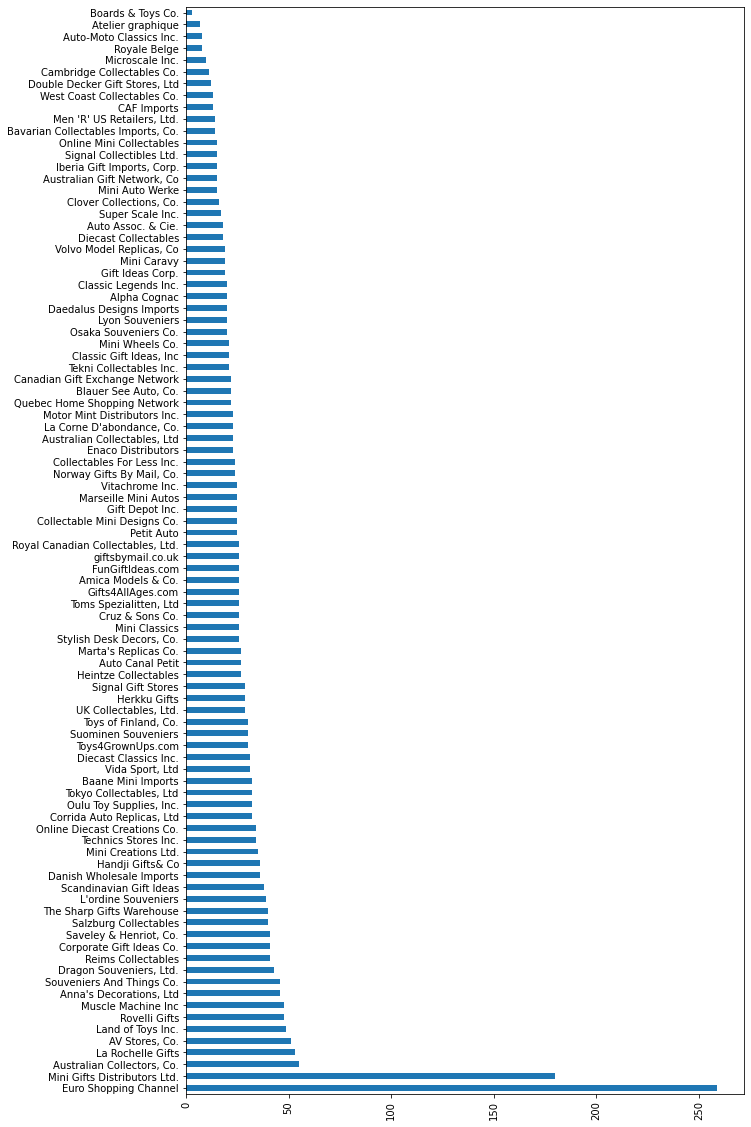

In [4]:
plt.figure(figsize = (10, 20))
sales['CUSTOMERNAME'].value_counts().plot(kind = 'barh')
plt.xticks(rotation = 'vertical')

In [5]:
sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
sales.shape

(2823, 25)

In [7]:
sales.duplicated().sum()

0

In [8]:
sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [9]:
full_name = sales["CONTACTLASTNAME"] + ' '+ sales['CONTACTFIRSTNAME']
full_name

0                Yu Kwai
1           Henriot Paul
2        Da Cunha Daniel
3            Young Julie
4            Brown Julie
              ...       
2818        Freyre Diego
2819    Koskitalo Pirkko
2820        Freyre Diego
2821      Roulet Annette
2822        Yoshido Juri
Length: 2823, dtype: object

In [10]:
sales['full_name'] = full_name
sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,full_name
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Da Cunha Daniel
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Young Julie
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,Freyre Diego
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,Koskitalo Pirkko
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,Freyre Diego
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,Roulet Annette


In [11]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,full_name
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,Yu Kwai
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,Henriot Paul
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Da Cunha Daniel
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,Young Julie
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,Brown Julie


In [12]:
sales = sales.drop(columns=['CONTACTFIRSTNAME','CONTACTLASTNAME', 'ADDRESSLINE2','POSTALCODE', 'ORDERLINENUMBER', 'PHONE', 'TERRITORY'])
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie


## EXPLORATORY DATA ANALYSIS

#### Calculate the best month of sales


In [47]:
sales.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
ADDRESSLINE1        object
CITY                object
STATE               object
COUNTRY             object
DEALSIZE            object
full_name           object
dtype: object

In [48]:
best_month_sales = sales.groupby('MONTH_ID').sum()
best_month_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,YEAR_ID,MSRP
MONTH_ID,,,,,,,
1,2349698,7997,19111.78,785874.44,229,458976,23081
2,2300254,7903,18902.49,810441.90,224,448952,22680
3,2179852,7585,17432.61,754501.39,212,424904,20883
4,1824713,6704,14763.28,669390.96,356,356710,17378
5,2595661,8992,21137.41,923972.56,504,505070,25658
6,1337996,4620,10873.51,454756.78,262,262478,13001
7,1441499,4899,12105.77,514875.97,423,282514,14686
8,1955772,6538,15974.11,659310.57,573,382706,19256
9,1749237,5681,14277.88,584724.27,513,342608,17245


In [49]:
best_month_sales['SALES']= best_month_sales['SALES']#.map(lambda x: '{:,.2f}'.format(x))
best_month_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,YEAR_ID,MSRP
MONTH_ID,,,,,,,
1,2349698,7997,19111.78,785874.44,229,458976,23081
2,2300254,7903,18902.49,810441.90,224,448952,22680
3,2179852,7585,17432.61,754501.39,212,424904,20883
4,1824713,6704,14763.28,669390.96,356,356710,17378
5,2595661,8992,21137.41,923972.56,504,505070,25658
6,1337996,4620,10873.51,454756.78,262,262478,13001
7,1441499,4899,12105.77,514875.97,423,282514,14686
8,1955772,6538,15974.11,659310.57,573,382706,19256
9,1749237,5681,14277.88,584724.27,513,342608,17245


Text(0.5, 0, 'Months')

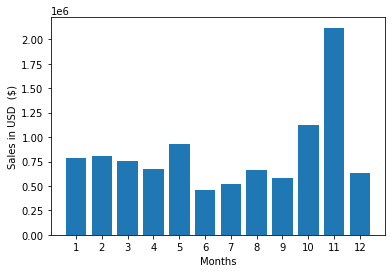

In [50]:
months = range(1, 13)
plt.bar(months, best_month_sales['SALES'], )
plt.xticks(months)
plt.ylabel('Sales in USD  ($)')
plt.xlabel('Months')

In [51]:
sales.isnull().sum()


ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
ADDRESSLINE1          0
CITY                  0
STATE              1486
COUNTRY               0
DEALSIZE              0
full_name             0
dtype: int64

In [52]:
##Which productline had the most sales
product_line = sales.groupby('PRODUCTLINE').sum()
product_line

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
PRODUCTLINE,,,,,,,,
Classic Cars,9918937,33992,84453.70,3919615.66,2684,7003,1937661,115929
Motorcycles,3395505,11663,27472.19,1166388.34,884,2275,663273,32130
Planes,3142556,10727,25012.72,975003.57,800,2081,613199,27163
Ships,2399856,8127,19622.18,714437.13,619,1622,468893,20154
Trains,789654,2712,5825.41,226243.47,209,549,154292,5620
Trucks and Buses,3087894,10777,26345.91,1127789.84,837,2210,603143,30842
Vintage Cars,6225979,21069,47435.96,1903150.84,1639,4282,1216309,52482


In [53]:
product_line.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
MSRP                 int64
dtype: object

Text(0.5, 1.0, 'Product line with the most sales')

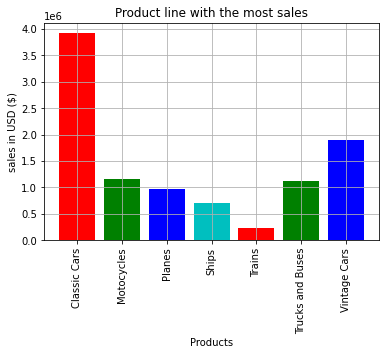

In [54]:
products = ['Classic Cars', 'Motocycles', 'Planes', 'Ships', 'Trains', 'Trucks and Buses', 'Vintage Cars']
colors = ['r', 'g', 'b', 'c']
plt.bar(products, product_line['SALES'], color = colors)
plt.grid()
plt.xticks(products, rotation = 'vertical')
plt.ylabel('sales in USD ($)')
plt.xlabel('Products')
plt.title('Product line with the most sales')

In [55]:
sales.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie


#### Which country had the highest order

In [56]:
highest_order_country = sales.groupby('COUNTRY').sum()
highest_order_country

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
COUNTRY,,,,,,,,
Australia,1898841,6246,15449.14,630623.10,511,1345,370706,18493
Austria,564648,1974,4759.16,202062.53,153,383,110211,5662
Belgium,339687,1074,2887.31,108412.62,80,188,66138,3335
Canada,719223,2293,5957.05,224078.56,206,545,140274,6941
Denmark,644467,2197,5503.89,245637.15,181,444,126228,6826
Finland,944808,3192,7722.15,329581.91,202,485,184374,9360
France,3223513,11090,25920.87,1110916.52,776,1960,629233,31330
Germany,636423,2148,5184.30,220472.09,198,525,124227,6281
Ireland,164059,490,1377.98,57756.43,30,81,32064,1710


In [57]:
highest_order_country.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
SALES              float64
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
MSRP                 int64
dtype: object

Text(0.5, 1.0, 'Quantity ordered per Country')

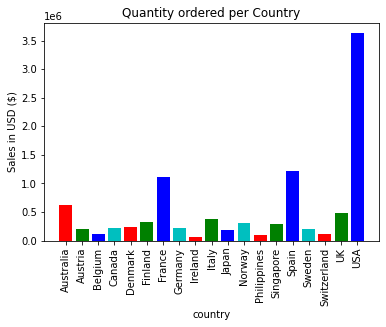

In [58]:
countries = [COUNTRY for COUNTRY, df in sales.groupby('COUNTRY')]
colors = ['r', 'g', 'b', 'c']
plt.bar(countries, highest_order_country['SALES'], color = colors )
plt.xticks(countries, rotation = 'vertical')
plt.xlabel('country')
plt.ylabel('Sales in USD ($)')
plt.title('Quantity ordered per Country')



Text(0, 0.5, 'Quantity Ordered ($)')

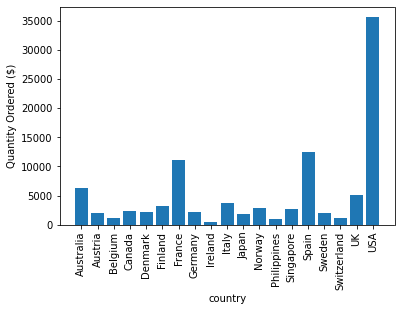

In [59]:
countries = [COUNTRY for COUNTRY, df in sales.groupby('COUNTRY')]
plt.bar(countries, highest_order_country['QUANTITYORDERED'])
plt.xticks(countries, rotation = 'vertical')
plt.xlabel('country')
plt.ylabel('Quantity Ordered ($)')

In [60]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie


In [61]:
sales.drop_duplicates()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Small,Freyre Diego
2819,10373,29,100.00,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,NaN,Finland,Medium,Koskitalo Pirkko
2820,10386,43,100.00,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium,Freyre Diego
2821,10397,34,62.24,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,NaN,France,Small,Roulet Annette


In [62]:
sales['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

Text(0, 0.5, 'status mode')

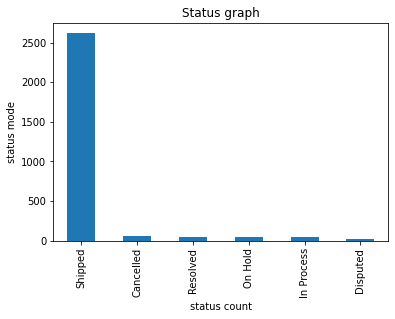

In [63]:
sales['STATUS'].value_counts().plot(kind = 'bar', )
plt.title('Status graph')
plt.xlabel('status count')
plt.ylabel('status mode')

### How many bicycles were shipped from 2003 - 2005

In [35]:
bike_shipped = sales[(sales['PRODUCTLINE'] == 'Motorcycles') & (sales['STATUS'] == 'Shipped')]
bike_shipped

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,10356,26,100.00,3937.70,12/9/2004 0:00,Shipped,4,12,2004,Motorcycles,81,S50_4713,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
2453,10365,44,100.00,4984.32,1/7/2005 0:00,Shipped,1,1,2005,Motorcycles,81,S50_4713,Mini Creations Ltd.,4575 Hillside Dr.,New Bedford,MA,USA,Medium,Tam Wing C
2454,10375,49,100.00,5406.66,2/3/2005 0:00,Shipped,1,2,2005,Motorcycles,81,S50_4713,La Rochelle Gifts,"67, rue des Cinquante Otages",Nantes,NaN,France,Medium,Labrune Janine
2455,10390,22,100.00,3491.18,3/4/2005 0:00,Shipped,1,3,2005,Motorcycles,81,S50_4713,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,CA,USA,Medium,Nelson Valarie


#### How many Trains got shipped from 2003 to 2005

In [23]:
trains_shipped = sales[(sales['PRODUCTLINE'] == 'Trains') & (sales['STATUS'] == 'Shipped')]
trains_shipped

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
1065,10105,38,100.00,4330.10,2/11/2003 0:00,Shipped,1,2,2003,Trains,100,S18_3259,Danish Wholesale Imports,Vinb'ltet 34,Kobenhavn,NaN,Denmark,Medium,Petersen Jytte
1066,10117,21,95.80,2011.80,4/16/2003 0:00,Shipped,2,4,2003,Trains,100,S18_3259,"Dragon Souveniers, Ltd.","Bronz Sok., Bronz Apt. 3/6 Tesvikiye",Singapore,NaN,Singapore,Small,Natividad Eric
1067,10128,41,100.00,4837.18,6/6/2003 0:00,Shipped,2,6,2003,Trains,100,S18_3259,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium,Freyre Diego
1068,10142,22,97.81,2151.82,8/8/2003 0:00,Shipped,3,8,2003,Trains,100,S18_3259,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,CA,USA,Small,Nelson Valarie
1069,10153,29,88.74,2573.46,9/28/2003 0:00,Shipped,3,9,2003,Trains,100,S18_3259,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Small,Freyre Diego
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,10359,25,64.93,1623.25,12/15/2004 0:00,Shipped,4,12,2004,Trains,58,S50_1514,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2428,10372,24,58.58,1405.92,1/26/2005 0:00,Shipped,1,1,2005,Trains,58,S50_1514,"Tokyo Collectables, Ltd",2-2-8 Roppongi,Minato-ku,Tokyo,Japan,Small,Shimamura Akiko
2429,10383,38,60.06,2282.28,2/22/2005 0:00,Shipped,1,2,2005,Trains,58,S50_1514,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Small,Freyre Diego
2430,10395,45,100.00,8977.05,3/17/2005 0:00,Shipped,1,3,2005,Trains,58,S50_1514,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Large,Da Cunha Daniel


Trains got shipped 75 times from the year 2003 -2005

#### How many times vintage cars got shipped from 2003-2005

In [26]:
vintage_shipped= sales[(sales['PRODUCTLINE'] == 'Vintage Cars') & (sales['STATUS'] == 'Shipped')]
vintage_shipped

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
475,10102,39,100.00,4808.31,1/10/2003 0:00,Shipped,1,1,2003,Vintage Cars,102,S18_1342,Vitachrome Inc.,2678 Kingston Rd.,NYC,NY,USA,Medium,Frick Michael
476,10111,33,99.66,3288.78,3/25/2003 0:00,Shipped,1,3,2003,Vintage Cars,102,S18_1342,Mini Wheels Co.,5557 North Pendale Street,San Francisco,CA,USA,Medium,Murphy Julie
477,10125,32,100.00,3254.72,5/21/2003 0:00,Shipped,2,5,2003,Vintage Cars,102,S18_1342,"Australian Collectors, Co.",636 St Kilda Road,Melbourne,Victoria,Australia,Medium,Ferguson Peter
478,10139,31,100.00,3184.94,7/16/2003 0:00,Shipped,3,7,2003,Vintage Cars,102,S18_1342,Souveniers And Things Co.,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,Australia,Medium,Huxley Adrian
479,10149,50,100.00,5907.50,9/12/2003 0:00,Shipped,3,9,2003,Vintage Cars,102,S18_1342,Signal Collectibles Ltd.,2793 Furth Circle,Brisbane,CA,USA,Medium,Taylor Sue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,10361,33,82.59,2725.47,12/17/2004 0:00,Shipped,4,12,2004,Vintage Cars,43,S50_1341,Souveniers And Things Co.,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,Australia,Small,Huxley Adrian
2373,10375,49,65.80,3224.20,2/3/2005 0:00,Shipped,1,2,2005,Vintage Cars,43,S50_1341,La Rochelle Gifts,"67, rue des Cinquante Otages",Nantes,NaN,France,Medium,Labrune Janine
2374,10388,27,100.00,3211.38,3/3/2005 0:00,Shipped,1,3,2005,Vintage Cars,43,S50_1341,FunGiftIdeas.com,1785 First Street,New Bedford,MA,USA,Medium,Benitez Violeta
2375,10398,49,36.66,1796.34,3/30/2005 0:00,Shipped,1,3,2005,Vintage Cars,43,S50_1341,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul


Vintage cars got shipped 557 times from 2003 - 2005

#### How many times classisc cars got shipped

In [28]:
classic_cars = sales[(sales['PRODUCTLINE'] == 'Classic Cars') & (sales['STATUS'] == 'Shipped')]
classic_cars

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
26,10103,26,100.00,5404.62,1/29/2003 0:00,Shipped,1,1,2003,Classic Cars,214,S10_1949,Baane Mini Imports,Erling Skakkes gate 78,Stavern,NaN,Norway,Medium,Bergulfsen Jonas
27,10112,29,100.00,7209.11,3/24/2003 0:00,Shipped,1,3,2003,Classic Cars,214,S10_1949,"Volvo Model Replicas, Co",Berguvsvgen 8,Lule,NaN,Sweden,Large,Berglund Christina
28,10126,38,100.00,7329.06,5/28/2003 0:00,Shipped,2,5,2003,Classic Cars,214,S10_1949,"Corrida Auto Replicas, Ltd","C/ Araquil, 67",Madrid,NaN,Spain,Large,Sommer Mart¡n
29,10140,37,100.00,7374.10,7/24/2003 0:00,Shipped,3,7,2003,Classic Cars,214,S10_1949,Technics Stores Inc.,9408 Furth Circle,Burlingame,CA,USA,Large,Hirano Juri
30,10150,45,100.00,10993.50,9/19/2003 0:00,Shipped,3,9,2003,Classic Cars,214,S10_1949,"Dragon Souveniers, Ltd.","Bronz Sok., Bronz Apt. 3/6 Tesvikiye",Singapore,NaN,Singapore,Large,Natividad Eric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,10348,32,82.83,2650.56,11/1/2004 0:00,Shipped,4,11,2004,Classic Cars,101,S700_2824,"Corrida Auto Replicas, Ltd","C/ Araquil, 67",Madrid,NaN,Spain,Small,Sommer Mart¡n
2636,10358,27,100.00,3761.37,12/10/2004 0:00,Shipped,4,12,2004,Classic Cars,101,S700_2824,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium,Freyre Diego
2637,10371,34,100.00,4301.34,1/23/2005 0:00,Shipped,1,1,2005,Classic Cars,101,S700_2824,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,CA,USA,Medium,Nelson Valarie
2638,10382,34,54.84,1864.56,2/17/2005 0:00,Shipped,1,2,2005,Classic Cars,101,S700_2824,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,CA,USA,Small,Nelson Valarie


Classic cars got shipped 914 times from 2003 -2005

In [29]:
trucks_buses = sales[(sales['PRODUCTLINE'] == 'Trucks and Buses') & (sales['STATUS'] == 'Shipped')]
trucks_buses

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
212,10103,27,100.00,3394.98,1/29/2003 0:00,Shipped,1,1,2003,Trucks and Buses,136,S12_1666,Baane Mini Imports,Erling Skakkes gate 78,Stavern,NaN,Norway,Medium,Bergulfsen Jonas
213,10113,21,100.00,3415.44,3/26/2003 0:00,Shipped,1,3,2003,Trucks and Buses,136,S12_1666,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,CA,USA,Medium,Nelson Valarie
214,10126,21,100.00,2439.57,5/28/2003 0:00,Shipped,2,5,2003,Trucks and Buses,136,S12_1666,"Corrida Auto Replicas, Ltd","C/ Araquil, 67",Madrid,NaN,Spain,Small,Sommer Mart¡n
215,10140,38,100.00,4829.80,7/24/2003 0:00,Shipped,3,7,2003,Trucks and Buses,136,S12_1666,Technics Stores Inc.,9408 Furth Circle,Burlingame,CA,USA,Medium,Hirano Juri
216,10150,30,100.00,4100.10,9/19/2003 0:00,Shipped,3,9,2003,Trucks and Buses,136,S12_1666,"Dragon Souveniers, Ltd.","Bronz Sok., Bronz Apt. 3/6 Tesvikiye",Singapore,NaN,Singapore,Medium,Natividad Eric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,10359,46,100.00,4896.70,12/15/2004 0:00,Shipped,4,12,2004,Trucks and Buses,115,S50_1392,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Medium,Henriot Paul
2401,10371,48,56.55,2714.40,1/23/2005 0:00,Shipped,1,1,2005,Trucks and Buses,115,S50_1392,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,CA,USA,Small,Nelson Valarie
2402,10383,29,100.00,3087.05,2/22/2005 0:00,Shipped,1,2,2005,Trucks and Buses,115,S50_1392,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium,Freyre Diego
2403,10395,46,100.00,5692.96,3/17/2005 0:00,Shipped,1,3,2005,Trucks and Buses,115,S50_1392,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel


Trucks and Buses were shpped 281 times from 2003-2005

In [30]:
planes_shipped =  sales[(sales['PRODUCTLINE'] == 'Planes') & (sales['STATUS'] == 'Shipped')]
planes_shipped

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
552,10106,36,100.00,5279.40,2/17/2003 0:00,Shipped,1,2,2003,Planes,157,S18_1662,Rovelli Gifts,Via Ludovico il Moro 22,Bergamo,NaN,Italy,Medium,Rovelli Giovanni
553,10119,43,100.00,6916.12,4/28/2003 0:00,Shipped,2,4,2003,Planes,157,S18_1662,Salzburg Collectables,Geislweg 14,Salzburg,NaN,Austria,Medium,Pipps Georg
554,10131,21,100.00,2781.66,6/16/2003 0:00,Shipped,2,6,2003,Planes,157,S18_1662,Gift Ideas Corp.,2440 Pompton St.,Glendale,CT,USA,Small,Lewis Dan
555,10143,32,100.00,5248.00,8/10/2003 0:00,Shipped,3,8,2003,Planes,157,S18_1662,Mini Creations Ltd.,4575 Hillside Dr.,New Bedford,MA,USA,Medium,Tam Wing C
556,10155,38,100.00,6531.44,10/6/2003 0:00,Shipped,4,10,2003,Planes,157,S18_1662,"Toys of Finland, Co.",Keskuskatu 45,Helsinki,NaN,Finland,Medium,Karttunen Matti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,10352,49,52.64,2579.36,12/3/2004 0:00,Shipped,4,12,2004,Planes,49,S72_1253,Auto-Moto Classics Inc.,16780 Pompton St.,Brickhaven,MA,USA,Small,Taylor Leslie
2791,10361,23,95.20,2189.60,12/17/2004 0:00,Shipped,4,12,2004,Planes,49,S72_1253,Souveniers And Things Co.,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,Australia,Small,Huxley Adrian
2792,10373,25,64.97,1624.25,1/31/2005 0:00,Shipped,1,1,2005,Planes,49,S72_1253,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,NaN,Finland,Small,Koskitalo Pirkko
2794,10398,34,40.22,1367.48,3/30/2005 0:00,Shipped,1,3,2005,Planes,49,S72_1253,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul


planes got shipped 271 times from 2003 to 2005

In [34]:
ships_shipped = sales[(sales['PRODUCTLINE'] == 'Ships') & (sales['STATUS'] == 'Shipped')]
ships_shipped

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
935,10106,41,83.44,3421.04,2/17/2003 0:00,Shipped,1,2,2003,Ships,86,S18_3029,Rovelli Gifts,Via Ludovico il Moro 22,Bergamo,NaN,Italy,Medium,Rovelli Giovanni
936,10119,21,89.46,1878.66,4/28/2003 0:00,Shipped,2,4,2003,Ships,86,S18_3029,Salzburg Collectables,Geislweg 14,Salzburg,NaN,Austria,Small,Pipps Georg
937,10130,40,96.34,3853.60,6/16/2003 0:00,Shipped,2,6,2003,Ships,86,S18_3029,Auto-Moto Classics Inc.,16780 Pompton St.,Brickhaven,MA,USA,Medium,Taylor Leslie
938,10143,46,74.84,3442.64,8/10/2003 0:00,Shipped,3,8,2003,Ships,86,S18_3029,Mini Creations Ltd.,4575 Hillside Dr.,New Bedford,MA,USA,Medium,Tam Wing C
939,10155,44,79.14,3482.16,10/6/2003 0:00,Shipped,4,10,2003,Ships,86,S18_3029,"Toys of Finland, Co.",Keskuskatu 45,Helsinki,NaN,Finland,Medium,Karttunen Matti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,10315,40,55.69,2227.60,10/29/2004 0:00,Shipped,4,10,2004,Ships,54,S72_3212,La Rochelle Gifts,"67, rue des Cinquante Otages",Nantes,NaN,France,Small,Labrune Janine
2817,10337,42,97.16,4080.72,11/21/2004 0:00,Shipped,4,11,2004,Ships,54,S72_3212,Classic Legends Inc.,5905 Pompton St.,NYC,NY,USA,Medium,Hernandez Maria
2818,10350,20,100.00,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Small,Freyre Diego
2819,10373,29,100.00,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,NaN,Finland,Medium,Koskitalo Pirkko


In [48]:
sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Small,Freyre Diego
2819,10373,29,100.00,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,NaN,Finland,Medium,Koskitalo Pirkko
2820,10386,43,100.00,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium,Freyre Diego
2821,10397,34,62.24,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,NaN,France,Small,Roulet Annette


Ships were shipped 195 times from 2003 t0 2005

### Find the number sales above 3000 and in the year 2003

In [49]:
high_sales = sales[(sales['SALES'] >= 3000) & (sales['YEAR_ID'] == 2003)]
high_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie
5,10168,36,96.66,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,9408 Furth Circle,Burlingame,CA,USA,Medium,Hirano Juri
7,10188,48,100.00,5512.32,11/18/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,"Drammen 121, PR 744 Sentrum",Bergen,NaN,Norway,Medium,Oeztan Veysel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,10197,35,93.35,3267.25,11/26/2003 0:00,Shipped,4,11,2003,Ships,99,S700_3962,Enaco Distributors,"Rambla de Catalu¤a, 23",Barcelona,NaN,Spain,Medium,Saavedra Eduardo
2747,10155,44,85.87,3778.28,10/6/2003 0:00,Shipped,4,10,2003,Planes,74,S700_4002,"Toys of Finland, Co.",Keskuskatu 45,Helsinki,NaN,Finland,Medium,Karttunen Matti
2748,10168,39,82.91,3233.49,10/28/2003 0:00,Shipped,4,10,2003,Planes,74,S700_4002,Technics Stores Inc.,9408 Furth Circle,Burlingame,CA,USA,Medium,Hirano Juri
2749,10178,45,76.25,3431.25,11/8/2003 0:00,Shipped,4,11,2003,Planes,74,S700_4002,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,NaN,France,Medium,Roulet Annette


556 sales were above $3000 in one single transaction in the year 2003

### Sales above 3000 in the year 2004

In [50]:
high_sales2 = sales[(sales['SALES'] >= 3000) & (sales['YEAR_ID'] == 2004)]
high_sales2

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
9,10211,41,100.00,4708.44,1/15/2004 0:00,Shipped,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,"25, rue Lauriston",Paris,NaN,France,Medium,Perrier Dominique
10,10223,37,100.00,3965.66,2/20/2004 0:00,Shipped,1,2,2004,Motorcycles,95,S10_1678,"Australian Collectors, Co.",636 St Kilda Road,Melbourne,Victoria,Australia,Medium,Ferguson Peter
12,10251,28,100.00,3188.64,5/18/2004 0:00,Shipped,2,5,2004,Motorcycles,95,S10_1678,Tekni Collectables Inc.,7476 Moss Rd.,Newark,NJ,USA,Medium,Brown William
13,10263,34,100.00,3676.76,6/28/2004 0:00,Shipped,2,6,2004,Motorcycles,95,S10_1678,Gift Depot Inc.,25593 South Bay Ln.,Bridgewater,CT,USA,Medium,King Julie
14,10275,45,92.83,4177.35,7/23/2004 0:00,Shipped,3,7,2004,Motorcycles,95,S10_1678,La Rochelle Gifts,"67, rue des Cinquante Otages",Nantes,NaN,France,Medium,Labrune Janine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,10328,39,85.87,3348.93,11/12/2004 0:00,Shipped,4,11,2004,Planes,74,S700_4002,Rovelli Gifts,Via Ludovico il Moro 22,Bergamo,NaN,Italy,Medium,Rovelli Giovanni
2764,10361,35,100.00,4277.35,12/17/2004 0:00,Shipped,4,12,2004,Planes,74,S700_4002,Souveniers And Things Co.,"Monitor Money Building, 815 Pacific Hwy",Chatswood,NSW,Australia,Medium,Huxley Adrian
2788,10329,44,86.13,3789.72,11/15/2004 0:00,Shipped,4,11,2004,Planes,49,S72_1253,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Medium,Yu Kwai
2816,10327,37,86.74,3209.38,11/10/2004 0:00,Resolved,4,11,2004,Ships,54,S72_3212,Danish Wholesale Imports,Vinb'ltet 34,Kobenhavn,NaN,Denmark,Medium,Petersen Jytte


711 sales were above $3000 in a single transaction in the year 2004

In [52]:
high_sales3 = sales[(sales['SALES'] >= 3000) & (sales['YEAR_ID'] == 2005)]
high_sales3

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
23,10388,42,76.36,3207.12,3/3/2005 0:00,Shipped,1,3,2005,Motorcycles,95,S10_1678,FunGiftIdeas.com,1785 First Street,New Bedford,MA,USA,Medium,Benitez Violeta
25,10417,66,100.00,7516.08,5/13/2005 0:00,Disputed,2,5,2005,Motorcycles,95,S10_1678,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Large,Freyre Diego
49,10369,41,100.00,4514.92,1/20/2005 0:00,Shipped,1,1,2005,Classic Cars,214,S10_1949,Collectables For Less Inc.,7825 Douglas Av.,Brickhaven,MA,USA,Medium,Nelson Allen
50,10381,36,100.00,8254.80,2/17/2005 0:00,Shipped,1,2,2005,Classic Cars,214,S10_1949,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Large,Brown Julie
52,10411,23,100.00,4140.23,5/1/2005 0:00,Shipped,2,5,2005,Classic Cars,214,S10_1949,Quebec Home Shopping Network,43 rue St. Laurent,Montreal,Quebec,Canada,Medium,Fresnisre Jean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,10398,36,87.36,3144.96,3/30/2005 0:00,Shipped,1,3,2005,Planes,74,S700_4002,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Medium,Henriot Paul
2793,10386,50,87.15,4357.50,3/1/2005 0:00,Resolved,1,3,2005,Planes,49,S72_1253,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium,Freyre Diego
2819,10373,29,100.00,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,NaN,Finland,Medium,Koskitalo Pirkko
2820,10386,43,100.00,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium,Freyre Diego


274 sales were above $3000 in the year 2005

### Find the company with the least transaction in the record

In [59]:
least = sales['CUSTOMERNAME'].value_counts()

least

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 92, dtype: int64

In [53]:
sales_deal_size = sales.groupby(['DEALSIZE', 'MONTH_ID']).sum()
sales_deal_size

ORDERNUMBER  QUANTITYORDERED  PRICEEACH       SALES  \
DEALSIZE MONTH_ID                                                        
Large    1               72111              323     700.00    59263.22   
         2              133432              566    1300.00   106246.58   
         3              123321              521    1200.00    94357.41   
         4              217128             1296    2068.53   182094.60   
         5              206334             1007    2000.00   168948.20   
         6               61029              252     600.00    49948.88   
         7               91758              374     900.00    73413.33   
         8               71548              297     700.00    57571.76   
         9              102358              449    1000.00    81548.22   
         10             143719              625    1400.00   117003.26   
         11             318092             1380    3100.00   254632.54   
         12              71727              324     700.00    57091.26   
Medium   1             1179653             4223   11025.35   497052.22   
         2             1222251             4571   11215.89   514926.54   
         3             1068993             3969   10031.25   465477.94   
         4              727095             2958    6516.95   317833.75   
         5             1246890             4687   11449.00   531276.65   
         6              694753             2666    6374.01   290806.45   
         7              705201             2617    6644.57   303749.10   
         8              983316             3676    9165.33   424575.13   
         9              735807             2608    7033.19   319833.42   
         10            1659418             5992   15582.84   714676.46   
         11            2995830            11015   27900.05  1289716.25   
         12             977847             3537    9042.22   417508.33   
Small    1             1097934             3451    7386.43   229559.00   
         2              944571             2766    6386.60   189268.78   
         3              987538             3095    6201.36   194666.04   
         4              880490             2450    6177.80   169462.61   
         5             1142437             3298    7688.41   223747.71   
         6              582214             1702    3899.50   114001.45   
         7              644540             1908    4561.20   137713.54   
         8              900908             2565    6108.78   177163.68   
         9              911072             2624    6244.69   183342.63   
         10            1445151             4381    9630.38   289535.50   
         11            2810139             8462   18990.38   574536.88   
         12             803776             2432    5243.36   160079.53   

                   QTR_ID  YEAR_ID   MSRP  
DEALSIZE MONTH_ID                          
Large    1              7    14032   1010  
         2             13    26055   1941  
         3             12    24051   1620  
         4             42    42096   3052  
         5             40    40087   3235  
         6             12    12020   1101  
         7             27    18031   1614  
         8             21    14025   1292  
         9             30    20036   1797  
         10            56    28049   2490  
         11           124    62109   4574  
         12            28    14023   1109  
Medium   1            115   230487  13579  
         2            119   238507  13279  
         3            104   208441  11494  
         4            142   142278   7806  
         5            242   242518  14071  
         6            136   136250   7694  
         7            207   138250   8206  
         8            288   192357  11512  
         9            216   144251   8782  
         10           648   324562  19398  
         11          1168   585026  33857  
         12           380   190341  10657  
Small    1            107   214457   8492  
         2        

In [68]:
sales2 = sales.copy()
sales2

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Small,Freyre Diego
2819,10373,29,100.00,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,NaN,Finland,Medium,Koskitalo Pirkko
2820,10386,43,100.00,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium,Freyre Diego
2821,10397,34,62.24,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,NaN,France,Small,Roulet Annette


In [69]:
#get the number of colums of datatype
#esp categorical variable
obj_type = (sales2.dtypes == "object")
print("Categorical variable: ",len(list(obj_type[obj_type].index)))

Categorical variable:  11


In [70]:
#import label encoder
from sklearn import preprocessing

lebel_encoder = preprocessing.LabelEncoder()
obj = (sales.dtypes == "object")
for col in list(obj_type[obj_type].index):
    sales2[col] = lebel_encoder.fit_transform(sales[col])

In [71]:
pd.options.display.max_rows = 40
sales2

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,112,5,1,2,2003,1,95,0,45,57,42,9,18,2,90
1,10121,34,81.35,2765.90,185,5,2,5,2003,1,95,0,66,40,56,16,6,2,32
2,10134,41,94.74,3884.34,204,5,3,7,2003,1,95,0,46,21,52,16,6,1,19
3,10145,45,83.26,3746.70,226,5,3,8,2003,1,95,0,85,54,53,1,18,1,87
4,10159,49,100.00,5205.27,23,5,4,10,2003,1,95,0,23,51,59,1,18,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,2244.40,88,5,4,12,2004,3,54,108,33,65,34,16,14,2,27
2819,10373,29,100.00,3978.51,16,5,1,1,2005,3,54,108,63,87,51,16,5,1,46
2820,10386,43,100.00,5417.57,119,4,1,3,2005,3,54,108,33,65,34,16,14,1,27
2821,10397,34,62.24,2116.16,136,5,1,3,2005,3,54,108,1,0,68,16,6,2,68


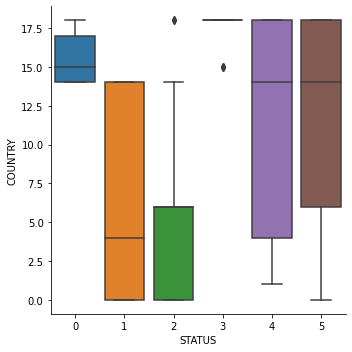

In [72]:
sns.catplot(data = sales2, x = 'STATUS', y = 'COUNTRY', kind = 'box')

In [73]:
sales.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie


##### In which month the products had their highest sales and quantityordered



In [78]:
pd.options.display.max_rows = 100
data = sales.groupby(['PRODUCTLINE', 'MONTH_ID']).sum()
data.sort_values(by = 'QUANTITYORDERED', ascending = False)

ORDERNUMBER  QUANTITYORDERED  PRICEEACH      SALES  \
PRODUCTLINE      MONTH_ID                                                       
Classic Cars     11            2245647             7548   18730.21  825156.26   
Vintage Cars     11            1343758             4435   10370.00  418663.74   
Classic Cars     10            1148714             3818    9995.60  465002.24   
                 5              884791             3057    7553.97  365946.75   
                 1              801334             2740    6933.81  303070.56   
                 2              751886             2586    6334.98  299647.80   
Motorcycles      11             718481             2521    5916.02  261057.36   
Vintage Cars     10             737958             2500    5514.83  216763.54   
Classic Cars     3              675891             2458    5672.57  277560.54   
                 4              564682             2310    4816.30  263252.00   
Trucks and Buses 11             635750             2290    5484.63  250874.06   
Classic Cars     8              666895             2224    5734.92  265302.43   
                 12             626833             2205    5216.37  237291.07   
Vintage Cars     1              634854             2189    4787.69  196129.58   
Classic Cars     7              592644             2028    5192.26  245292.95   
                 9              612206             1938    5263.16  234673.08   
Vintage Cars     3              584741             1901    4552.50  177935.27   
Planes           11             534806             1898    4279.78  175263.97   
Vintage Cars     5              514709             1780    3771.85  146877.00   
Ships            11             491964             1668    3999.63  143075.65   
Trucks and Buses 5              412782             1433    3520.64  151270.15   
Vintage Cars     2              390993             1391    3005.73  127119.79   
                 9              429683             1380    3247.74  126146.22   
                 12             411651             1354    3185.69  131216.63   
                 4              369516             1324    2718.47  115941.63   
Trucks and Buses 10             338606             1206    2890.03  123813.57   
Planes           4              338359             1171    2696.41  103359.77   
                 2              316565             1154    2570.20  107905.65   
Motorcycles      4              329030             1152    2703.85  119606.88   
                 2              348638             1151    2968.67  122801.68   
Planes           10             326947             1115    2698.13  106777.65   
Motorcycles      8              317102             1115    2471.75  106869.84   
Vintage Cars     8              327889             1113    2562.78  101424.51   
Classic Cars     6              347414             1080    3009.55  137419.98   
Motorcycles      10             327097             1054    2638.65  103649.61   
                 5              287449             1053    2351.11  108335.97   
Trucks and Buses 12             267607              978    2242.63  104133.74   
Ships            10             276611              957    2225.33   79791.74   
Vintage Cars     6              255438              926    1934.40   74568.35   
Planes           3              249412              883    1863.95   79735.05   
Motorcycles      1              246732              837    1967.26   81113.88   
Trucks and Buses 9              224862              825    1951.11   85297.65   
Planes           5              247988              807    1966.62   74929.05   
                 6              234598              795    1860.49   68765.93   
Ships            3              227515              789    1884.24   74341.94   
Vintage Cars     7              224789              776    1784.28   70364.58   
Planes           12             227513              767    1830.24   68497.74   
                 8              245132              755   

<AxesSubplot: >

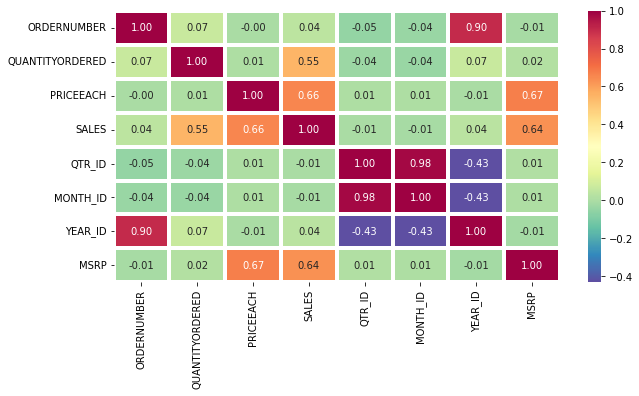

In [79]:
plt.figure(figsize=(10, 5))
sns.heatmap(sales.corr(), cmap ="Spectral_r", fmt = '.2f', linewidths = 4, annot = True)

## Insights from the heatmap above

##### The heatmap above shows that there are correlation between some variable using the scale of 0 and 1





##### 1 There's correlation between SALES AND QUANTITYORDERED

##### 2 There's correlation between SALES AND PRICEEACH



#### 3 There's correlation between SALES AND MSRP


##### 4 There's correlation between YEAR_ID AND ORDERNUMBER


##### 5 There's correlation between MONTH_ID AND QTR_iD


##### 6 There's correlation between PRICEEACH AND MSRP

In [80]:
sales.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE,full_name
0,10107,30,95.70,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small,Yu Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small,Henriot Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium,Da Cunha Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium,Young Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium,Brown Julie


In [81]:
##Extracted dataframe to use for linearRegression.
sales_mach = sales[['ORDERNUMBER','PRODUCTLINE', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'QTR_ID', 'MONTH_ID', 'MSRP']]
sales_mach

,ORDERNUMBER,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,MSRP
0,10107,Motorcycles,30,95.70,2871.00,1,2,95
1,10121,Motorcycles,34,81.35,2765.90,2,5,95
2,10134,Motorcycles,41,94.74,3884.34,3,7,95
3,10145,Motorcycles,45,83.26,3746.70,3,8,95
4,10159,Motorcycles,49,100.00,5205.27,4,10,95
...,...,...,...,...,...,...,...,...
2818,10350,Ships,20,100.00,2244.40,4,12,54
2819,10373,Ships,29,100.00,3978.51,1,1,54
2820,10386,Ships,43,100.00,5417.57,1,3,54
2821,10397,Ships,34,62.24,2116.16,1,3,54


In [82]:
x_labels =['QUANTITYORDERED', 'PRICEEACH']

x_data = sales_mach[x_labels]
y_data = sales_mach['SALES']

In [83]:
x_data.shape, y_data.shape

((2823, 2), (2823,))

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2258, 2), (565, 2), (2258,), (565,))

In [86]:
lr =LinearRegression()
model = lr.fit(x_train, y_train)

In [87]:
print('B0: ', model.intercept_)
print('B1: ', model.coef_)

B0:  -5101.229070565592
B1:  [103.70473827  59.69820478]


In [88]:
test = [[47, 65]]
model.predict(test)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3653.27693893])

In [89]:
##compute trainin accuracy
train_pred = model.predict(x_train)
print('first 20 prdicted: ', train_pred[:20])
print()
print('first 20 Original: ', y_train[:20].values)

first 20 prdicted:  [2443.01219918 4685.2887616  3419.17340831 1775.07885318 3461.20986455
 4290.84777068 3162.12485626 2417.17183306 5742.7141064  3461.20986455
 2453.76087371 4029.20249334 2003.89011789 2953.01100145 4394.55250894
 4083.43829415 1450.49075721 3564.91460282 2779.88620758 4290.84777068]

first 20 Original:  [1832.6  3866.4  2916.76 1892.1  2528.25 4072.2  2650.56 1878.66 8236.75
 2872.25 2150.55 3350.52 1777.6  2560.47 8014.82 3139.99 1721.73 3918.46
 2464.77 3366.  ]


In [90]:
##compute test accuracy
from sklearn.metrics import r2_score

test_pred = model.predict(x_test)
print('Model accuracy on training data: ', r2_score(train_pred, y_train.values))
print('Model accuracy on test data: ', r2_score(test_pred, y_test.values))

Model accuracy on training data:  0.6390595435626492
Model accuracy on test data:  0.6192036404725589


In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_data, y_data, cv =5)

print('Cross- Validation scores: ', scores)
print('Mean score: ', scores.mean())
print("Standard deviation: ", scores.std())

Cross- Validation scores:  [0.50335413 0.72680204 0.78913961 0.73754849 0.63362958]
Mean score:  0.6780947700974624
Standard deviation:  0.10074675403383757


### Plot the model prediction

In [ ]:
plt.figure(figsize= (10, 5))
plt.plot(x_data['QUANTITYORDERED'], y_data, 'o')
plt.plot(x_data[])